In [1]:
import numpy as np
import qutip
from qutip import basis, sigmax, sigmaz, Bloch
import matplotlib as mpl
from matplotlib import cm
import imageio
import os

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmax, sigmay, sigmaz, mesolve, Bloch

##------Définition de la fonction------##

def simulate_time_evolution(omega_q, omega_d):
    # Define coupling strength
    g = omega_q / 40  # la valeur du couplage peut être changée
    
    # Define the computational basis states
    x0 = (basis(2,0) + (1+0j)*basis(2,1)).unit()
    x1 = (basis(2,0) - (1+0j)*basis(2,1)).unit()
    y0 = (basis(2,0) + (0+1j)*basis(2,1)).unit()
    y1 = (basis(2,0) - (0+1j)*basis(2,1)).unit()
    z0 = (basis(2,0) + (0+0j)*basis(2,1)).unit()
    z1 = (0*basis(2,0) + (1+0j)*basis(2,1)).unit()

    # Time list
    time_list = np.linspace(0, 22, 1001)

    # Define the initial state
    psi0 = z0  # ground state in 2 level system

    # Define the time-dependent Hamiltonian
    H0 = -omega_q / 2 * sigmaz()
    H1 = -g * sigmax()
    H = [H0, [H1, lambda t: np.cos(omega_d * t)]]

    # Solve the Schrödinger equation
    result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()], options={"store_states": True})

    # Expectation values of X, Y, Z
    exp_x = result.expect[0]
    exp_y = result.expect[1]
    exp_z = result.expect[2]

    # Find key times
    index_target0 = (np.abs(exp_z + 1)).argmax()
    t_0 = time_list[index_target0]
    print("Time needed to reach |0> state:", t_0)

    index_target1 = (np.abs(exp_z + 1)).argmin()
    t_1 = time_list[index_target1]
    print("Time needed to reach |1> state:", t_1)

    index_targeti = (np.abs(exp_y + 1)).argmax()
    t_i = time_list[index_targeti]
    print("Time needed to reach |i> state:", t_i)

    index_targetmi = (np.abs(exp_y + 1)).argmin()
    t_mi = time_list[index_targetmi]
    print("Time needed to reach |-i> state:", t_mi)

    # Plot the expectation values over time
    plt.figure()
    plt.plot(time_list, exp_x, color="blue", label=r"$\langle\hat{X}\rangle$")
    plt.plot(time_list, exp_y, color="green", label=r"$\langle\hat{Y}\rangle$")
    plt.plot(time_list, exp_z, color="red", label=r"$\langle\hat{Z}\rangle$")
    plt.vlines(t_i, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="orange", label=r"$t_{|i\rangle}$")
    plt.vlines(t_1, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="black", label=r"$t_{|1\rangle}$")
    plt.vlines(t_mi, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="blue", label=r"$t_{|-i\rangle}$")
    plt.vlines(t_0, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="black", label=r"$t_{|0\rangle}$")
    plt.legend(loc=0)
    plt.xlabel(r"Time [1/$f_q$]")
    plt.ylabel("Expectation value")
    plt.show()

    # Plot on Bloch sphere
    b = Bloch()
    b.make_sphere()

    # Plot the time trace of the state
    b.add_states([psi0])
    b.add_points(result.expect, meth="l", colors="red")
    #b.add_points([[exp_x[index_targeti]], [exp_y[index_targeti]], [exp_z[index_targeti]]], meth="m", colors="orange")
    #b.add_points([[exp_x[index_targetmi]], [exp_y[index_targetmi]], [exp_z[index_targetmi]]], meth="m", colors="blue")
    #b.add_points([[exp_x[index_target1]], [exp_y[index_target1]], [exp_z[index_target1]]], meth="m", colors="black")
    #b.add_points([[exp_x[index_target0]], [exp_y[index_target0]], [exp_z[index_target0]]], meth="m", colors="black")
    b.render()
    b.show()
    return result


In [ ]:
import numpy as np
import qutip
from qutip import basis, sigmax, sigmaz, Bloch, mesolve
import matplotlib.pyplot as plt
import imageio
import os
import matplotlib as mpl
from matplotlib import cm

##------Définition de la fonction de passage dans le référentiel tournant pour un drive------##
def simulate_in_rotating_frame_drive(result,omega_q,omega_d):
    time_list = np.linspace(0, 44, 2001) # [1/f_q] time points normalized by qubit freq
    delta=omega_q-omega_d
    g = omega_q / 40 #we can changer coupling here if changed above in lab frame
    psi0 = (basis(2,0) + (0+0j)*basis(2,1)).unit()
    
    # Definition of the ROTATING FRAME Hamiltonian
    H = -delta/2 * sigmaz() - g/2 * sigmax()
    eigvals, eigstates = H.eigenstates()
    # solve the Schrodinger equation
    result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()],options={"store_states":True})
    
    # plot the expectation value of X
    exp_x = result.expect[0]
    exp_y = result.expect[1]
    exp_z = result.expect[2]
    
    #Find time when |0> is reached 
    #index_target0 = (np.abs(exp_z+1)).argmax()
    #t_0 = time_list[index_target0]
    #print("Time needed to reach |0> state : ", t_0)
    
    #Find time when |1> is reached 
    index_target1 = (np.abs(exp_z+1)).argmin()
    t_1 = time_list[index_target1]
    print("Time needed to reach |1> state : ", t_1)
    
    #Find time when |i> is reached 
    index_targeti = (np.abs(exp_y+1)).argmax()
    t_i = time_list[index_targeti]
    print("Time needed to reach |i> state : ", t_i)
    
    #Find time when |-i> is reached 
    index_targetmi = (np.abs(exp_y+1)).argmin()
    t_mi = time_list[index_targetmi]
    print("Time needed to reach |-i> state : ", t_mi)
    
    plt.figure()
    plt.plot(time_list, exp_x, color="blue", label=r"$\langle\hat{X}\rangle$")
    plt.plot(time_list, exp_y, color="green", label=r"$\langle\hat{Y}\rangle$")
    plt.plot(time_list, exp_z, color="red", label=r"$\langle\hat{Z}\rangle$")
    plt.vlines(t_i, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="orange",label=r"$t_{|i\rangle}$") 
    plt.vlines(t_1, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="black",label=r"$t_{|1\rangle}$")
    plt.vlines(t_mi, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="blue",label=r"$t_{|-i\rangle}$")
    #plt.vlines(t_0, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="black",label=r"$t_{|0\rangle}$")
    plt.legend(loc=0)
    plt.xlabel(r"Time [1/$f_q$]")
    plt.ylabel("Expectation value")
    
    
    # plot on Bloch sphere
    b = Bloch()
    b.make_sphere()
    
    # plot the time trace of the state
    b.add_states([psi0])
    b.add_states(eigstates)
    b.add_points(result.expect, meth="l", colors="red")
    # b.add_points([[exp_x[index_targeti]], [exp_y[index_targeti]], [exp_z[index_targeti]]], meth="m", colors="orange")
    # b.add_points([[exp_x[index_targetmi]], [exp_y[index_targetmi]], [exp_z[index_targetmi]]], meth="m", colors="blue")
    # b.add_points([[exp_x[index_target1]], [exp_y[index_target1]], [exp_z[index_target1]]], meth="m", colors="black")
    #b.add_points([[exp_x[index_target0]], [exp_y[index_target0]], [exp_z[index_target0]]], meth="m", colors="black")
    b.render()
    b.show()

Time needed to reach |0> state: 0.0
Time needed to reach |1> state: 19.997999999999998
Time needed to reach |i> state: 10.01
Time needed to reach |-i> state: 9.504


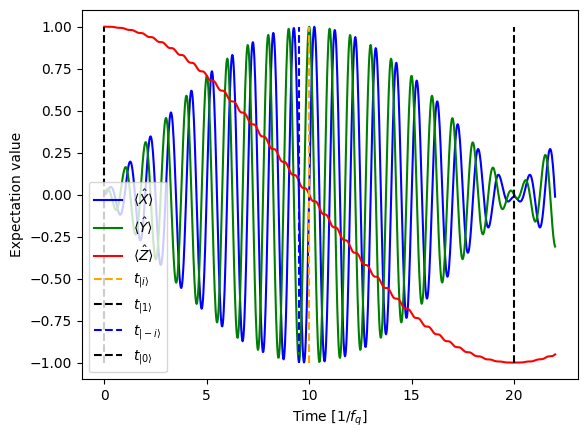

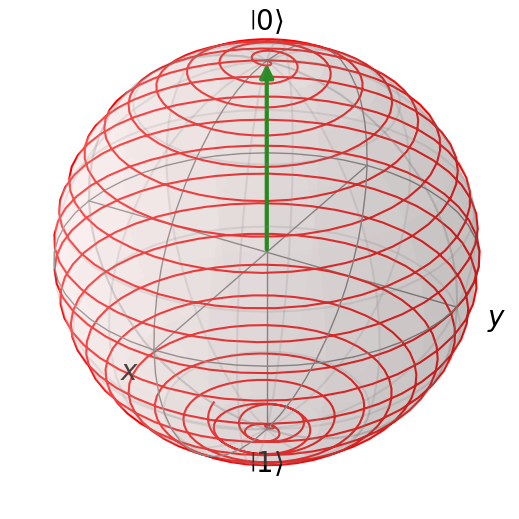

Time needed to reach |1> state :  19.997999999999998
Time needed to reach |i> state :  10.01
Time needed to reach |-i> state :  30.008


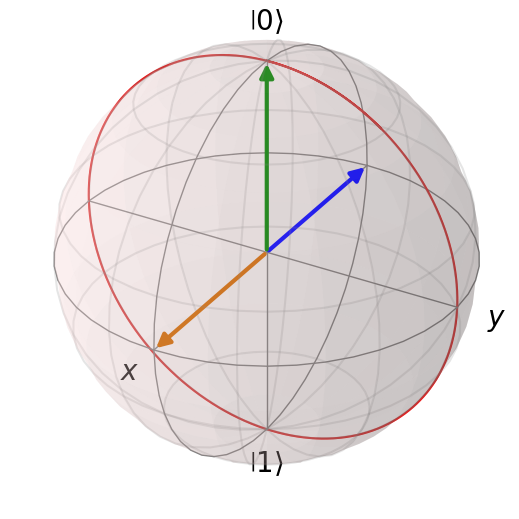

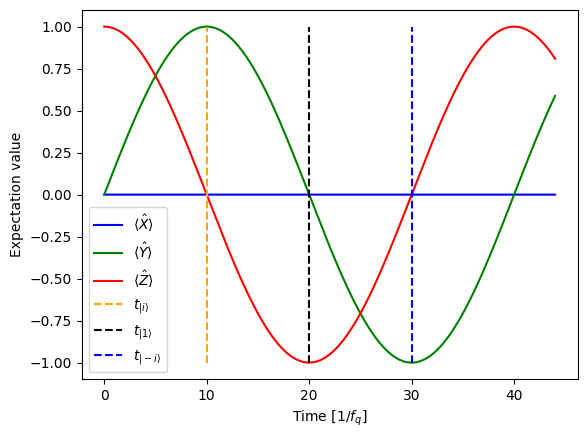

In [23]:
##------Appel de la fonction pour passer dans le référentiel tournant, il faut ajouter le même omega_z et omega_d que ceux choisis dans le ref. du laboratoire------##
simulate_in_rotating_frame_drive(simulate_time_evolution(omega_q=2*np.pi, omega_d=2*np.pi),omega_q=2*np.pi,omega_d=2*np.pi)

##la deuxième sphère de Bloch correspond au référentiel tournant.
##attention à changer le temps 22 et 44 si le couplage est changé

In [16]:
import numpy as np
import qutip
from qutip import basis, sigmax, sigmaz, Bloch, mesolve
import matplotlib.pyplot as plt
import imageio
import os
import matplotlib as mpl
from matplotlib import cm

# -----------------------
# Paramètres et définitions
# -----------------------
omega_q = 2 * np.pi     # Fréquence du qubit (champ en Z)
omega_d = 2 * np.pi     # Fréquence de modulation dans le terme en X
g = omega_q / 40        # Amplitude du champ en X

# État initial |0>
psi0 = basis(2, 0)

# Liste de temps pour la simulation
time_list = np.linspace(0, 20, 800)  # Par exemple, de 0 à 1 (vous pouvez adapter)

# Définition des Hamiltoniens
H0 = -omega_q/2 * sigmaz() 
H1 = -g * sigmax()

# Hamiltonien dépendant du temps :
# H(t) = H0 + H1 * cos(omega_d * t)
H = [H0, [H1, lambda t, args: np.cos(omega_d * t)]]

# -----------------------
# 1. Résolution de l'équation de Schrödinger avec mesolve
# -----------------------
result = mesolve(H, psi0, time_list, e_ops=[sigmax(), sigmay(), sigmaz()],
                 options={"store_states": True})

# Extraction des états solution
states_td = result.states  # Liste de qutip.Qobj représentant l'état à chaque instant

# -----------------------
# 2. Simuler une approche itérative "à la méthode pour un H indépendant du temps"
# Ici, on se contente de récupérer la liste d'états obtenue via mesolve.
# -----------------------
bloch_states = []  
for state in states_td:
    bloch_states.append(state)
expect = result.expect

In [17]:
# --- Fonction d'animation sur la sphère de Bloch ---
def animate_bloch(states, expectation, gif_name='bloch_anim.gif', duration=0.1, save_all=False):
    """
    Crée une animation GIF de l'évolution des états sur la sphère de Bloch.
    
    Paramètres:
    -----------
    states : list of qutip.Qobj
        Liste des états à afficher sur la sphère de Bloch (par exemple, la trajectoire d'un état en rotation).
    eigstates : list of qutip.Qobj
        Liste des états propres de l'opérateur de rotation, représentant l'axe de rotation à afficher en arrière-plan.
    gif_name : str, optionnel
        Nom du fichier GIF à enregistrer. Par défaut, 'bloch_anim.gif'.
    duration : float, optionnel
        Durée (en secondes) d'affichage de chaque image dans l'animation.
    save_all : bool, optionnel
        Si True, sauvegarde toutes les images dans un dossier temporaire.
    
    Sauvegarde:
    -----------
    Un fichier GIF nommé selon le paramètre gif_name est créé dans le répertoire courant.
    """
    b = Bloch()
    b.vector_color = ['r']
    #b.view = [-40, 30]
    images = []
    
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    
    # Normalisation des couleurs
    nrm = mpl.colors.Normalize(0, length)
    colors = cm.cool(nrm(range(length)))
    b.point_color = list(colors)
    b.point_marker = ['o']
    b.point_size = [30]
    
    # Créer un dossier temporaire si nécessaire
    temp_dir = 'tmp_bloch'
    if save_all:
        if not os.path.exists(temp_dir):
            os.makedirs(temp_dir)
    
    for i in range(length):
        b.clear()  # Efface tous les états de la sphère
        # Ajouter l'axe de rotation (les états propres de M)
        #b.add_states(eigstates)
        b.add_points(expectation, meth="l", colors="red")
        # Ajouter l'état courant (pour visualiser l'évolution) 
        b.add_states([states[i]])
        # Ajouter tous les états jusqu'à l'instant i en mode "point" pour tracer la trajectoire
        b.add_states(states[:i+1], kind='point')
        
        if save_all:
            filename = os.path.join(temp_dir, f"bloch_{i:03d}.png")
        else:
            filename = "temp_bloch.png"
        b.save(filename)
        images.append(imageio.imread(filename))
    
    imageio.mimsave(gif_name, images, duration=duration)
    
    # Nettoyage du dossier temporaire si nécessaire
    if save_all:
        for file in os.listdir(temp_dir):
            os.remove(os.path.join(temp_dir, file))
        os.rmdir(temp_dir)

In [18]:
# -----------------------
# 4. Appel de la fonction d'animation pour visualiser l'évolution sur la sphère de Bloch
# -----------------------
animate_bloch(bloch_states, expect, gif_name='bloch_anim_fixe.gif', duration=0.1, save_all=False)

/var/folders/0r/nnn8yqwd549bhsr3jqz9kqyh0000gn/T/ipykernel_38926/2950902677.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
